# 데이터의 통계를 표현하는 박스 플롯
- 박스플롯을 이용하여 데이터의 통계와 이상치를 표현할 수 있다.
___

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# 그래프에 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 그래프에 마이너스 기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

c:\Users\user\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## 1. 박스플롯
- 데이터로부터 얻어진 아래의 다섯 가지 요약 수치를 사용해서 그려진다.
___
1. 최소값
2. 제 1사분위 수(Q1) : 전체 데이터 중 하위 25%에 해당하는 값
3. 제 2사분위 수 또는 중위수(Q2)
4. 제 3사분위 수(Q3) : 전체 데이터 중 상위 25%에 해당하는 값
5. 최대값

- 다른 값들과 동떨어진 값을 이상치로 표현한다.
    예시) 어떤 값이 (1/4 지점의 값 - 1.5 * 사분위수 범위)보다 작거나, (3/4 지점의 값 + 1.5 * 사분위수 범위)보다 크면 그 값을 이상치로 정한다.
- 사분위수 범위 = 3/4 지점의 값 - 1/4 지점의 값


### 1.1. 샘플 데이터
___
- 125명의 점수 데이터


In [7]:
import numpy as np
# 안풀어도 40점 이상은 보장되는 시험이다.
scores = pd.Series(np.random.randint(40, 101, 125))

scores

0      85
1      84
2      63
3      63
4      46
       ..
120    46
121    79
122    96
123    70
124    82
Length: 125, dtype: int32

#### 1.1.1. 샘플데이터의 통계값
시리즈.describe()

In [8]:
scores.describe()

count    125.000000
mean      70.088000
std       18.107215
min       40.000000
25%       54.000000
50%       68.000000
75%       85.000000
max      100.000000
dtype: float64

#### 1.1.2. 이상치 구하기
1. 1/4 지점의 값: series.quantile(.25)
2. 3/4 지점의 값: series.quantile(.75)
3. 이상치
    - 1/4 지점의 값 - 1.5*(사분위수 범위)
    - 3/4 지점의 값 + 1.5*(사붐위수 범위)

In [9]:
Q1 = scores.quantile(.25)
print('1/4 지점의 값:', Q1)

Q2 = scores.quantile(.75)
print('3/4 지점의 값:', Q2)

# 이상치
print('이상치: ', Q1 - 1.5*(Q2 - Q1), '미만')
print('이상치: ', Q2 + 1.5*(Q2 - Q1), '이상')

1/4 지점의 값: 54.0
3/4 지점의 값: 85.0
이상치:  7.5 미만
이상치:  131.5 이상


### 1.2. 박스 플롯
- plt.boxplot(data)

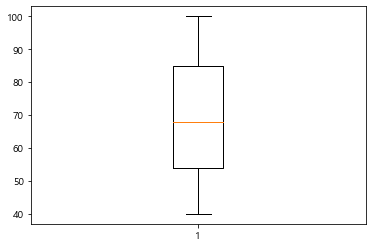

In [11]:
plt.boxplot(scores)
plt.show()
# 박스 안의 주황색 줄이 50%(2/4)
# 박스 윗 부분이 75%
# 박스 아랫 부분이 25%
# np.rand.randint라서 다소 균일하게 나타남

### 1.3. 평균 표시하기
- showmeans = True
- meanline = True

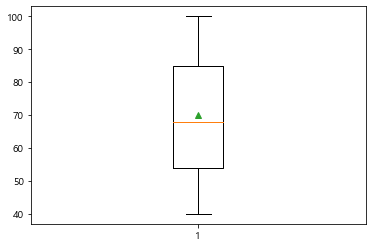

In [12]:
plt.boxplot(scores, showmeans=True) # 초록색 삼각형으로 표시됨
plt.show()

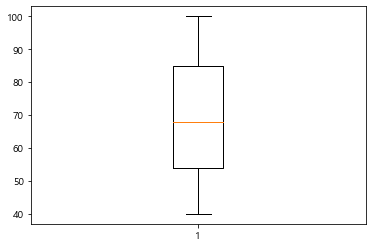

In [14]:
plt.boxplot(scores, meanline=True) # meanline은 단독으로는 의미가 없음
plt.show()

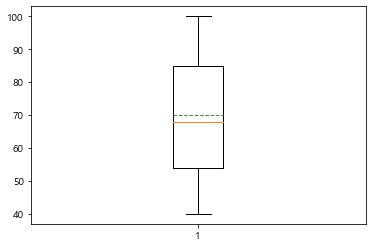

In [15]:
plt.boxplot(scores, showmeans=True, meanline=True) # showmeans, meanline이 동시에 true면 mean 부분이 line으로 표시됨
plt.show()

### 1.4. 수평 박스플롯
- vert = False

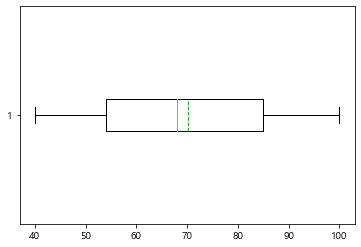

In [17]:
plt.boxplot(scores, showmeans=True, meanline=True, vert=False)
plt.show()


## 2. 여러개의 데이터 비교하기
___

### 2.1. 샘플 데이터
- 아이리스 데이터

In [18]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2.2. 여러 개의 데이터 비교하기
- plt.boxplot(데이터리스트, label(labels) = 레이블리스트)

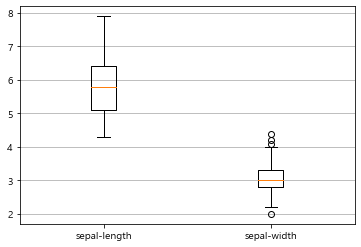

In [28]:
plt.boxplot([iris['sepal_length'], iris['sepal_width']], labels=['sepal-length', 'sepal-width'])
plt.grid(axis='y') # y축 그리드 생성
plt.show()
